## **Hand written Digit Classification with CNN**

## Import Libraries and Datasets

In [ ]:
#Importing the library
import tensorflow as tf

In [ ]:
#Loading the dataset (here MNIST dataset)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

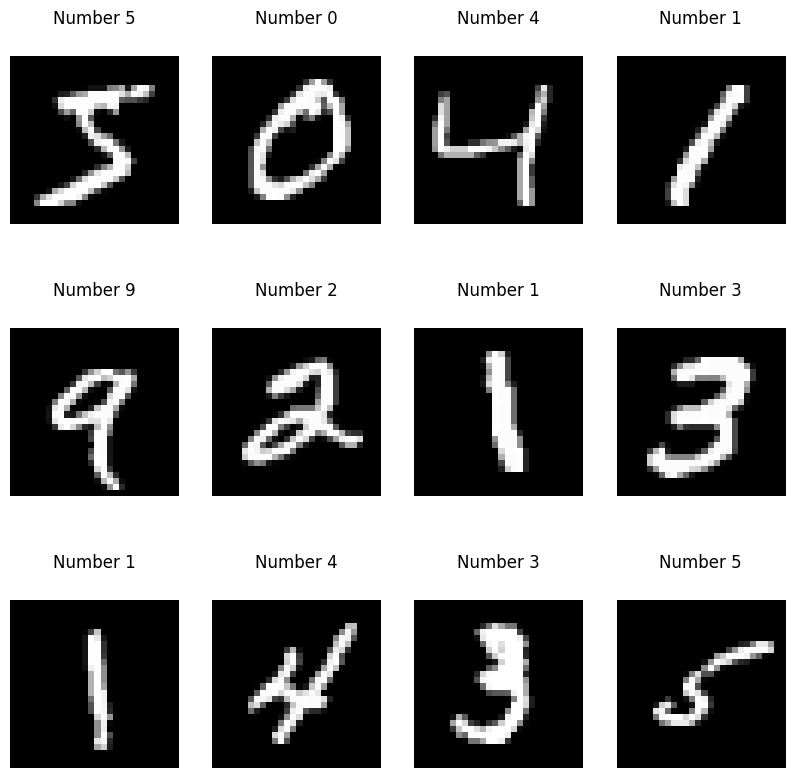

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(3, 4, figsize=(10,10))  #(rows, clms, figsize =(size, size))
plt.gray()
for i, ax in enumerate(axes.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))
  fig.show()

## Preprocessing

In [ ]:
#RESHAPING array to 4-dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape=(28, 28, 1)

In [ ]:
#NORMALIZING
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255  #8bit color coding so 2^8=256(0 to 255)
x_test /= 255
print('x_train shape:',x_train.shape)
print('Number of image in x_train:',x_train.shape[0])
print('Number of image in x_test:',x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of image in x_train: 60000
Number of image in x_test: 10000


## Building the Convolutional Neural Network

In [ ]:
#Using Sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

## Compiling and Training the Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=1)

1875/1875 [==============================] - 35s 19ms/step - loss: 0.0337 - accuracy: 0.9889


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0288 - accuracy: 0.9905
Epoch 2/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0234 - accuracy: 0.9921
Epoch 3/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0209 - accuracy: 0.9929


## Evaluating the Model

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0640 - accuracy: 0.9832


[0.0639701634645462, 0.9832000136375427]